<a href="https://colab.research.google.com/github/kadiyalamani15/Determining-Influential-Macroeconomic-Indicators-for-the-Australian-Stock-Market/blob/main/final_factors_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading Data

df = pd.read_excel("79_indices_agg.xlsx")
df.head()

,DATE,AUSBOT,AUSBP,AUSBR,AUSCA,AUSCARS,AUSCBBS,AUSCCON,AUSCCPI,AUSCF,...,AUSSSR,AUSSSRC,AUSSSRE,AUSTOT,AUSTOUR,AUSTVS,AUSUNP,AUSUNR,AUSUNRY,AUSWAGE
0,2010-01-31,-1399,-1.8,473,-18223,12269.3,78419.25,1792.18,95.8660,18295,...,10.5,10.5,1.5,105.4,448700,86146,607.867,5.3,11.3,968.3
1,2010-02-28,-1418,2.7,827,-18223,12269.3,78180.50,1802.41,95.8660,18295,...,10.5,10.5,1.5,105.4,560100,86045,611.984,5.3,11.3,968.3
2,2010-03-31,-2105,11.3,904,-18223,12269.3,84303.40,1807.67,95.8660,18295,...,10.5,10.5,1.5,105.4,526300,85783,626.429,5.4,11.8,968.3
3,2010-04-30,495,-6.9,737,-8978,12269.3,81429.00,1815.12,96.2427,5386,...,10.5,10.5,1.5,120.0,428900,92950,636.386,5.5,11.9,981.3
4,2010-05-31,958,-6.4,914,-8978,12269.3,92267.75,1823.88,96.2427,5386,...,10.5,10.5,1.5,120.0,375000,88942,603.493,5.2,11.4,981.3


In [4]:
# Column Names

df.columns

Index(['DATE', 'AUSBOT', 'AUSBP', 'AUSBR', 'AUSCA', 'AUSCARS', 'AUSCBBS',
       'AUSCCON', 'AUSCCPI', 'AUSCF', 'AUSCI', 'AUSCINF', 'AUSCNCN',
       'AUSCONPMI', 'AUSCOP', 'AUSCP', 'AUSCPI', 'AUSCPIC', 'AUSCSP', 'AUSCU',
       'AUSCUR', 'AUSDINV', 'AUSDPINC', 'AUSEC', 'AUSEDBT', 'AUSEMP',
       'AUSEXPX', 'AUSEXVOL', 'AUSFDI', 'AUSFER', 'AUSFTEMP', 'AUSG',
       'AUSGAGR', 'AUSGBGT', 'AUSGBVL', 'AUSGCP', 'AUSGD', 'AUSGDG', 'AUSGFCF',
       'AUSGNP', 'AUSGOLD', 'AUSGPC', 'AUSGSP', 'AUSGYLD', 'AUSHOOD',
       'AUSIBOR', 'AUSIMPX', 'AUSIMVOL', 'AUSINFEX', 'AUSJOBADV', 'AUSJVAC',
       'AUSLC', 'AUSLEI', 'AUSLFPR', 'AUSLPS', 'AUSM1', 'AUSM3', 'AUSMANWG',
       'AUSMKT', 'AUSMP', 'AUSMPMI', 'AUSNHS', 'AUSOIL', 'AUSPPI', 'AUSPPIC',
       'AUSPROD', 'AUSPSAV', 'AUSPTEMP', 'AUSRSY', 'AUSSPMI', 'AUSSSR',
       'AUSSSRC', 'AUSSSRE', 'AUSTOT', 'AUSTOUR', 'AUSTVS', 'AUSUNP', 'AUSUNR',
       'AUSUNRY', 'AUSWAGE'],
      dtype='object')

In [5]:
# Dropping DATE column to perform required analysis

df.drop(['DATE'], axis=1, inplace=True)

In [6]:
# Checking Data Quality

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 79 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AUSBOT     108 non-null    int64  
 1   AUSBP      108 non-null    float64
 2   AUSBR      108 non-null    int64  
 3   AUSCA      108 non-null    int64  
 4   AUSCARS    108 non-null    float64
 5   AUSCBBS    108 non-null    float64
 6   AUSCCON    108 non-null    float64
 7   AUSCCPI    108 non-null    float64
 8   AUSCF      108 non-null    int64  
 9   AUSCI      108 non-null    float64
 10  AUSCINF    108 non-null    float64
 11  AUSCNCN    108 non-null    float64
 12  AUSCONPMI  108 non-null    float64
 13  AUSCOP     108 non-null    float64
 14  AUSCP      108 non-null    int64  
 15  AUSCPI     108 non-null    float64
 16  AUSCPIC    108 non-null    float64
 17  AUSCSP     108 non-null    int64  
 18  AUSCU      108 non-null    float64
 19  AUSCUR     108 non-null    float64
 20  AUSDINV   

79 variables, non-null

In [7]:
# Correlation

df_corr = df.corr(method='pearson')
df_corr

,AUSBOT,AUSBP,AUSBR,AUSCA,AUSCARS,AUSCBBS,AUSCCON,AUSCCPI,AUSCF,AUSCI,...,AUSSSR,AUSSSRC,AUSSSRE,AUSTOT,AUSTOUR,AUSTVS,AUSUNP,AUSUNR,AUSUNRY,AUSWAGE
AUSBOT,1.000000,-0.049577,-0.285529,0.851858,0.116214,0.057328,0.164736,0.082134,-0.707841,0.575253,...,0.097549,0.097549,0.025098,0.234859,0.212904,-0.162709,-0.265187,-0.441104,-0.312728,0.037718
AUSBP,-0.049577,1.000000,0.146819,-0.075708,-0.043676,-0.040529,-0.052526,-0.040752,0.104626,-0.071565,...,-0.070444,-0.070444,-0.074074,0.014940,-0.052592,0.041424,0.040695,0.086537,0.117865,-0.027973
AUSBR,-0.285529,0.146819,1.000000,-0.270888,-0.450486,-0.429340,-0.444138,-0.421120,0.284957,-0.433386,...,-0.464373,-0.464373,-0.382314,0.356332,-0.495279,-0.143428,-0.280130,-0.108595,-0.182588,-0.371526
AUSCA,0.851858,-0.075708,-0.270888,1.000000,0.036358,-0.041539,0.053395,0.011237,-0.825081,0.383428,...,-0.040959,-0.040959,-0.146830,0.340831,0.109635,-0.181777,-0.193341,-0.273534,-0.150231,0.007190
AUSCARS,0.116214,-0.043676,-0.450486,0.036358,1.000000,0.951512,0.988917,0.993122,-0.106201,0.511008,...,0.932038,0.932038,0.870471,-0.813380,0.704862,0.596513,0.741753,0.370449,0.396041,0.973560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AUSTVS,-0.162709,0.041424,-0.143428,-0.181777,0.596513,0.607516,0.578633,0.603369,0.148725,0.200826,...,0.537051,0.537051,0.516949,-0.567870,0.400303,1.000000,0.589034,0.407925,0.345080,0.622232
AUSUNP,-0.265187,0.040695,-0.280130,-0.193341,0.741753,0.788386,0.683064,0.764876,0.083583,-0.027993,...,0.661712,0.661712,0.615630,-0.744095,0.475458,0.589034,1.000000,0.893258,0.823477,0.776416
AUSUNR,-0.441104,0.086537,-0.108595,-0.273534,0.370449,0.464622,0.289028,0.401166,0.149195,-0.375094,...,0.305182,0.305182,0.275781,-0.489044,0.177588,0.407925,0.893258,1.000000,0.880011,0.430736
AUSUNRY,-0.312728,0.117865,-0.182588,-0.150231,0.396041,0.484571,0.330488,0.422622,0.028451,-0.255926,...,0.350746,0.350746,0.305363,-0.424704,0.203487,0.345080,0.823477,0.880011,1.000000,0.432354


In [8]:
# Bartlett Test

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(42487.86566074874, 0.0)

P value < 0.005 hence the data is not a identity matrix, there lies correlation in the data

In [9]:
# KMO Test

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.7099227362426941

P value > 0.65 hence data is elgible for PCA testing

In [10]:
def pca_components(df):
  
  
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(df)
  pca = PCA()
  dataset_pca = pca.fit(scaled_data).transform(scaled_data)
  eigen_values = pca.explained_variance_

  components = 0

  for i in eigen_values:
    if i >= 1:
      components += 1
  
  return (eigen_values, components, scaled_data)

In [11]:
def varimax(factors, scaled_data):

  labels = ['Factors' + str(i) for i in range(1, factors+1)]

  fa = FactorAnalyzer()
  fa.set_params(n_factors=factors, method='principal', rotation='varimax')
  fa.fit(scaled_data)
  loadings_data = pd.DataFrame(fa.loadings_, index=df.columns, columns=labels)
  loadings_data = loadings_data.round(3)
  loadings_data[loadings_data.abs() < 0.5] = None
  loaded_variables = loadings_data.isnull().sum(axis=1)
  
  cum_variance = fa.get_factor_variance() 

  for loc, val in enumerate(loaded_variables):
    if val != (factors -1):
      statement = f"Reiterate PCA test and drop variable {loaded_variables.index[loc]}"
      break
    else:
      statement = "Everything looks good, proceed with ADF"
      continue


  return (loadings_data, cum_variance, statement)

In [12]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 12
Reiterate PCA test and drop variable AUSBR


In [13]:
df.drop(['AUSBR'], axis=1, inplace=True)

In [14]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 12
Reiterate PCA test and drop variable AUSCI


In [15]:
df.drop(['AUSCI'], axis=1, inplace=True)

In [16]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 12
Reiterate PCA test and drop variable AUSCONPMI


In [17]:
df.drop(['AUSCONPMI'], axis=1, inplace=True)

In [18]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 12
Reiterate PCA test and drop variable AUSCU


In [19]:
df.drop(['AUSCU'], axis=1, inplace=True)

In [20]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 11
Reiterate PCA test and drop variable AUSCOP


In [21]:
df.drop(['AUSCOP'], axis=1, inplace=True)

In [22]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 11
Reiterate PCA test and drop variable AUSCP


In [23]:
df.drop(['AUSCP'], axis=1, inplace=True)

In [24]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 11
Reiterate PCA test and drop variable AUSFDI


In [25]:
df.drop(['AUSFDI'], axis=1, inplace=True)

In [26]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 11
Reiterate PCA test and drop variable AUSFTEMP


In [27]:
df.drop(['AUSFTEMP'], axis=1, inplace=True)

In [28]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 10
Reiterate PCA test and drop variable AUSGBGT


In [29]:
df.drop(['AUSGBGT'], axis=1, inplace=True)

In [30]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 10
Reiterate PCA test and drop variable AUSGD


In [31]:
df.drop(['AUSGD'], axis=1, inplace=True)

In [32]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res= varimax(factors, scaled_data)
print(res)

No. of factors: 10
Reiterate PCA test and drop variable AUSJVAC


In [33]:
df.drop(['AUSJVAC'], axis=1, inplace=True)

In [34]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 10
Reiterate PCA test and drop variable AUSLC


In [35]:
df.drop(['AUSLC'], axis=1, inplace=True)

In [36]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 10
Reiterate PCA test and drop variable AUSLEI


In [37]:
df.drop(['AUSLEI'], axis=1, inplace=True)

In [38]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 10
Reiterate PCA test and drop variable AUSNHS


In [39]:
df.drop(['AUSNHS'], axis=1, inplace=True)

In [40]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 10
Reiterate PCA test and drop variable AUSINFEX


In [41]:
df.drop(['AUSINFEX'], axis=1, inplace=True)

In [42]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 9
Reiterate PCA test and drop variable AUSPROD


In [43]:
df.drop(['AUSPROD'], axis=1, inplace=True)

In [44]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 9
Reiterate PCA test and drop variable AUSUNP


In [45]:
df.drop(['AUSUNP'], axis=1, inplace=True)

In [46]:
e_v, factors, scaled_data = pca_components(df)
print(f'No. of factors: {factors}')
loadings_data, cum_variance, res = varimax(factors, scaled_data)
print(res)

No. of factors: 9
Everything looks good, proceed with ADF


In [47]:
loadings_data

,Factors1,Factors2,Factors3,Factors4,Factors5,Factors6,Factors7,Factors8,Factors9
AUSBOT,NaN,NaN,NaN,0.827,NaN,NaN,NaN,NaN,NaN
AUSBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.745
AUSCA,NaN,NaN,NaN,0.930,NaN,NaN,NaN,NaN,NaN
AUSCARS,0.990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUSCBBS,0.949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
AUSTOUR,0.740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUSTVS,0.586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUSUNR,NaN,-0.864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUSUNRY,NaN,-0.798,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
loadings_data.to_excel('belongingness9.xlsx')

In [49]:
# Using the Kaiser Criterion, the no. of Components are selected

f = []
nf = []
for i in e_v :
  if (i >= 1) :
    print(i)
    f.append(round(i,4))
    nf.append(round(i,4))
  else:
    f.append(None)
    nf.append(round(i,4))

df_eigen = pd.DataFrame(columns=["Factors","NFactors"])
df_eigen['Factors'] = f
df_eigen['NFactors'] = nf
df_eigen.index += 1
df_eigen

33.733073191655976
7.79192374500283
3.9535939258291855
2.9384815039981977
1.7955712704832898
1.5141498005680547
1.358610272609094
1.2137031352695342
1.0332245069532764


,Factors,NFactors
1,33.7331,33.7331
2,7.7919,7.7919
3,3.9536,3.9536
4,2.9385,2.9385
5,1.7956,1.7956
...,...,...
58,NaN,0.0000
59,NaN,0.0000
60,NaN,0.0000
61,NaN,0.0000


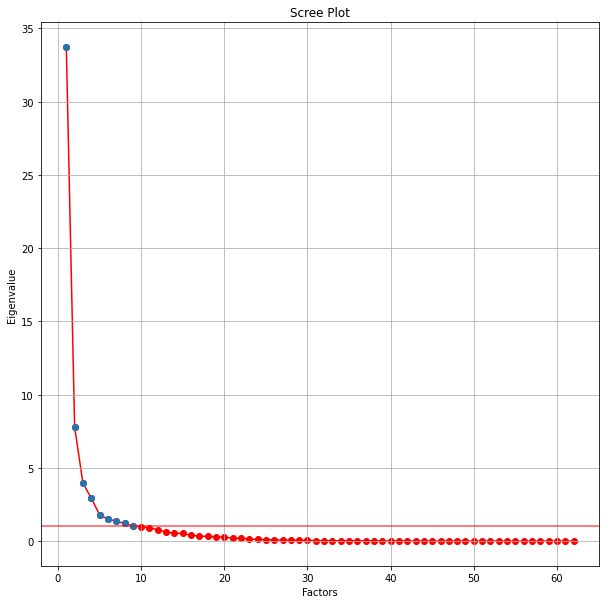

In [75]:
# Visualizing Eigen Values

def scree_plot():
  plt.figure(figsize=(10,10))
  df_eigen['NFactors'].plot(color='r', marker='o', zorder=0)
  plt.scatter(df_eigen.index, df_eigen['Factors'], zorder=1)
  plt.axhline(y=1, linewidth=2, color='r', alpha=0.5)
  plt.title('Scree Plot')
  plt.xlabel('Factors')
  plt.ylabel('Eigenvalue')
  plt.grid()
  plt.savefig('scree_plot_9.png')
  plt.show()
  

scree_plot()

In [51]:
components_stats_summary = pd.DataFrame(cum_variance, index=['SS Loadings', 'Variance_Ratio','Cummulative_Variance'], columns=['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6','Factor7','Factor8','Factor9'])
components_stats_summary = components_stats_summary.transpose()
components_stats_summary

,SS Loadings,Variance_Ratio,Cummulative_Variance
Factor1,33.178050,0.535130,0.535130
Factor2,5.934956,0.095725,0.630855
Factor3,3.467384,0.055926,0.686780
Factor4,3.915329,0.063150,0.749931
Factor5,2.078247,0.033520,0.783451
Factor6,1.980951,0.031951,0.815402
Factor7,1.442988,0.023274,0.838676
Factor8,1.694644,0.027333,0.866009
Factor9,1.127443,0.018185,0.884193


In [52]:
components_stats_summary.to_excel('components_stats_summary.xlsx')

In [57]:
Factor1 = [variable for row, variable in enumerate(loadings_data.index) if loadings_data.iloc[row,0] >= 0.5]
Factor1

['AUSCARS',
 'AUSCBBS',
 'AUSCCON',
 'AUSCCPI',
 'AUSCPI',
 'AUSCSP',
 'AUSDPINC',
 'AUSEDBT',
 'AUSEMP',
 'AUSEXVOL',
 'AUSFER',
 'AUSGCP',
 'AUSGDG',
 'AUSGNP',
 'AUSGPC',
 'AUSGSP',
 'AUSIMPX',
 'AUSIMVOL',
 'AUSLPS',
 'AUSM1',
 'AUSM3',
 'AUSMANWG',
 'AUSMKT',
 'AUSMPMI',
 'AUSPPI',
 'AUSSPMI',
 'AUSSSR',
 'AUSSSRC',
 'AUSSSRE',
 'AUSTOUR',
 'AUSTVS',
 'AUSWAGE']

In [59]:
Factor2 = [variable for row, variable in enumerate(loadings_data.index) if loadings_data.iloc[row,1] >= 0.5]
Factor2

['AUSJOBADV', 'AUSLFPR']

In [60]:
Factor3 = [variable for row, variable in enumerate(loadings_data.index) if loadings_data.iloc[row,2] >= 0.5]
Factor3

['AUSG', 'AUSGFCF']

In [61]:
Factor4 = [variable for row, variable in enumerate(loadings_data.index) if loadings_data.iloc[row,3] >= 0.5]
Factor4

['AUSBOT', 'AUSCA', 'AUSEXPX']

In [62]:
Factor5 = [variable for row, variable in enumerate(loadings_data.index) if loadings_data.iloc[row,4] >= 0.5]
Factor5

['AUSMP']

In [64]:
Factor6 = [variable for row, variable in enumerate(loadings_data.index) if loadings_data.iloc[row,5] >= 0.5]
Factor6

['AUSDINV', 'AUSGAGR']

In [65]:
Factor7 = [variable for row, variable in enumerate(loadings_data.index) if loadings_data.iloc[row,6] >= 0.5]
Factor7

['AUSEC', 'AUSPTEMP']

In [66]:
Factor8 = [variable for row, variable in enumerate(loadings_data.index) if loadings_data.iloc[row,7] >= 0.5]
Factor8

['AUSPPIC']

In [68]:
Factor9 = [variable for row, variable in enumerate(loadings_data.index) if loadings_data.iloc[row,8] >= 0.5]
Factor9

['AUSGBVL']

In [72]:
all_factors = pd.DataFrame([Factor1, Factor2, Factor3, Factor4, Factor5, Factor6, Factor7, Factor8, Factor9])
all_factors = all_factors.transpose()
all_factors.index += 1
all_factors.set_axis(['Factor1','Factor2','Factror3','Factor4','Facor5','Factor6','Factor7','Factor8','Factor9'], axis='columns', inplace=True)
all_factors

,Factor1,Factor2,Factror3,Factor4,Facor5,Factor6,Factor7,Factor8,Factor9
1,AUSCARS,AUSJOBADV,AUSG,AUSBOT,AUSMP,AUSDINV,AUSEC,AUSPPIC,AUSGBVL
2,AUSCBBS,AUSLFPR,AUSGFCF,AUSCA,None,AUSGAGR,AUSPTEMP,None,None
3,AUSCCON,None,None,AUSEXPX,None,None,None,None,None
4,AUSCCPI,None,None,None,None,None,None,None,None
5,AUSCPI,None,None,None,None,None,None,None,None
6,AUSCSP,None,None,None,None,None,None,None,None
7,AUSDPINC,None,None,None,None,None,None,None,None
8,AUSEDBT,None,None,None,None,None,None,None,None
9,AUSEMP,None,None,None,None,None,None,None,None
10,AUSEXVOL,None,None,None,None,None,None,None,None


In [73]:
all_factors.to_excel('all_factors_pca.xlsx')

In [89]:
final_factors = loadings_data.transpose()
final_factors = pd.DataFrame(final_factors.idxmax(axis=1), columns=['Variables'])
final_factors['Loading_Values'] = loadings_data.max()
final_factors

,Variables,Loading_Values
Factors1,AUSCCON,0.996
Factors2,AUSLFPR,0.861
Factors3,AUSG,0.936
Factors4,AUSCA,0.930
Factors5,AUSMP,0.772
Factors6,AUSGAGR,0.813
Factors7,AUSPTEMP,0.804
Factors8,AUSPPIC,0.707
Factors9,AUSGBVL,0.576


In [90]:
final_factors.to_excel('final_factors.xlsx')